In [4]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("Live.csv")
df.head()

status_id status_type status_published  \
0  246675545449582_1649696485147474       video   4/22/2018 6:00   
1  246675545449582_1649426988507757       photo  4/21/2018 22:45   
2  246675545449582_1648730588577397       video   4/21/2018 6:17   
3  246675545449582_1648576705259452       photo   4/21/2018 2:29   
4  246675545449582_1645700502213739       photo   4/18/2018 3:22   

   num_reactions  num_comments  num_shares  num_likes  num_loves  num_wows  \
0            529           512         262        432         92         3   
1            150             0           0        150          0         0   
2            227           236          57        204         21         1   
3            111             0           0        111          0         0   
4            213             0           0        204          9         0   

   num_hahas  num_sads  num_angrys  Column1  Column2  Column3  Column4  
0          1         1           0      NaN      NaN      NaN      NaN  
1          0         0           0      NaN      NaN      NaN      NaN  
2          1         0           0      NaN      NaN      NaN      NaN  
3          0         0           0      NaN      NaN      NaN      NaN  
4          0         0           0      NaN      NaN      NaN      NaN

In [6]:
df = df.drop(df.columns[12:16],axis=1)
df.columns

Index(['status_id', 'status_type', 'status_published', 'num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys'],
      dtype='object')

In [7]:
df.drop(["status_published","status_id"],axis=1,inplace=True)
df.head()

status_type  num_reactions  num_comments  num_shares  num_likes  num_loves  \
0       video            529           512         262        432         92   
1       photo            150             0           0        150          0   
2       video            227           236          57        204         21   
3       photo            111             0           0        111          0   
4       photo            213             0           0        204          9   

   num_wows  num_hahas  num_sads  num_angrys  
0         3          1         1           0  
1         0          0         0           0  
2         1          1         0           0  
3         0          0         0           0  
4         0          0         0           0

In [8]:
dfenc = df.copy()
le=LabelEncoder()
dfenc["status_type"] = le.fit_transform(df.status_type)

In [9]:
sd = MinMaxScaler()
df_std = pd.DataFrame(sd.fit_transform(dfenc))
df_std.columns = dfenc.columns
df_std.head()

status_type  num_reactions  num_comments  num_shares  num_likes  num_loves  \
0     1.000000       0.112314      0.024393    0.076519   0.091720   0.140030   
1     0.333333       0.031847      0.000000    0.000000   0.031847   0.000000   
2     1.000000       0.048195      0.011243    0.016647   0.043312   0.031963   
3     0.333333       0.023567      0.000000    0.000000   0.023567   0.000000   
4     0.333333       0.045223      0.000000    0.000000   0.043312   0.013699   

   num_wows  num_hahas  num_sads  num_angrys  
0  0.010791   0.006369  0.019608         0.0  
1  0.000000   0.000000  0.000000         0.0  
2  0.003597   0.006369  0.000000         0.0  
3  0.000000   0.000000  0.000000         0.0  
4  0.000000   0.000000  0.000000         0.0

### Finding best number of cluster for clustering using elbow method

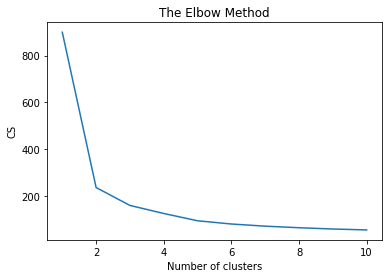

In [10]:
cs=[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(df_std)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [11]:
#k = 4
kmeans = KMeans(n_clusters=4)
y = kmeans.fit_predict(df_std)

In [12]:
y.shape

(7050,)

In [20]:
plt.figure(figsize=(10,10))
plt.scatter(df_std.iloc[y==0,0],df_std.iloc[y==0,1],c="red",label="cluster1")
plt.scatter(df_std.iloc[y==1,0],df_std.iloc[y==1,1],c="blue",label="cluster2")
plt.scatter(df_std.iloc[y==2,0],df_std.iloc[y==2,1],c="green",label="cluster3")
plt.scatter(df_std.iloc[y==3,0],df_std.iloc[y==3,1],c="black",label="cluster4")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c="yellow",label="centroid")
plt.xlabel(df_std.columns[0])
plt.ylabel(df_std.columns[1])
plt.legend()
plt.show()

## Heircal clustering 

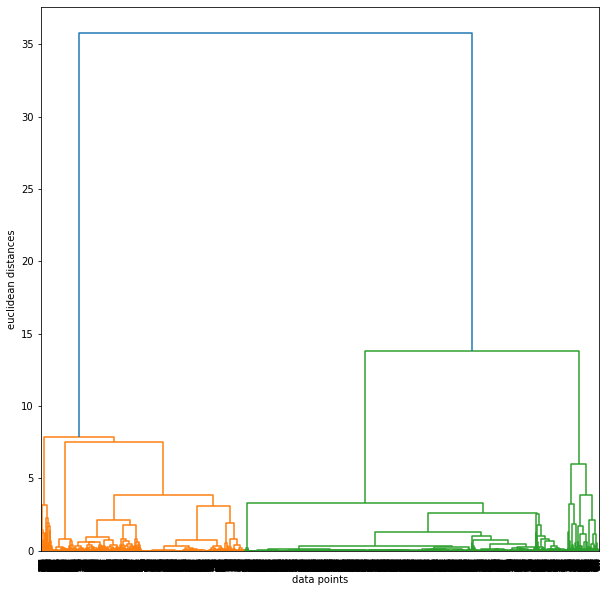

In [14]:

from scipy.cluster.hierarchy import linkage, dendrogram 
"""Dendrogram is a tree diagram that records the sequences of merges or splits in a hierarchical clustering.
It is used to find the optimal number of clusters in the data."""
plt.figure(figsize=(10, 10)) 
merg = linkage(df_std, method = "ward") 
dendrogram(merg, leaf_rotation = 90) 
plt.xlabel("data points")
plt.ylabel("euclidean distances")
plt.show()

In [15]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(df_std)

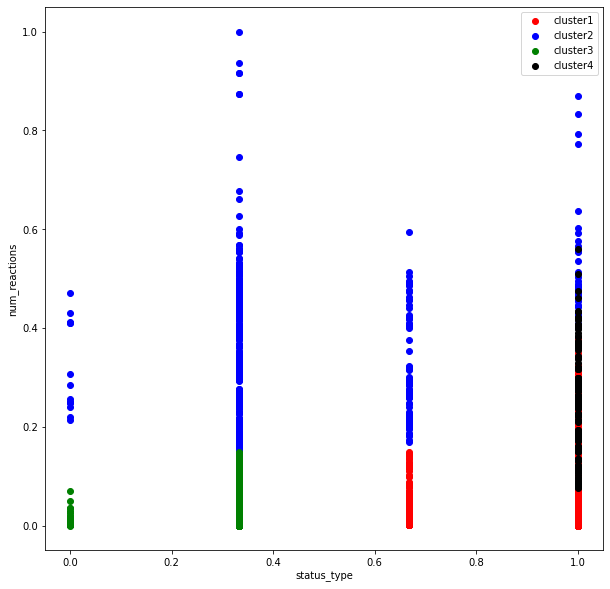

In [19]:
#plotting
plt.figure(figsize=(10,10))
plt.scatter(df_std.iloc[y_hc==0,0],df_std.iloc[y_hc==0,1],c="red",label="cluster1")
plt.scatter(df_std.iloc[y_hc==1,0],df_std.iloc[y_hc==1,1],c="blue",label="cluster2")
plt.scatter(df_std.iloc[y_hc==2,0],df_std.iloc[y_hc==2,1],c="green",label="cluster3")
plt.scatter(df_std.iloc[y_hc==3,0],df_std.iloc[y_hc==3,1],c="black",label="cluster4")
plt.xlabel(df_std.columns[0])
plt.ylabel(df_std.columns[1])
plt.legend()
plt.show()

Text(0.5, 1.0, 'Hierarchical Clustering')

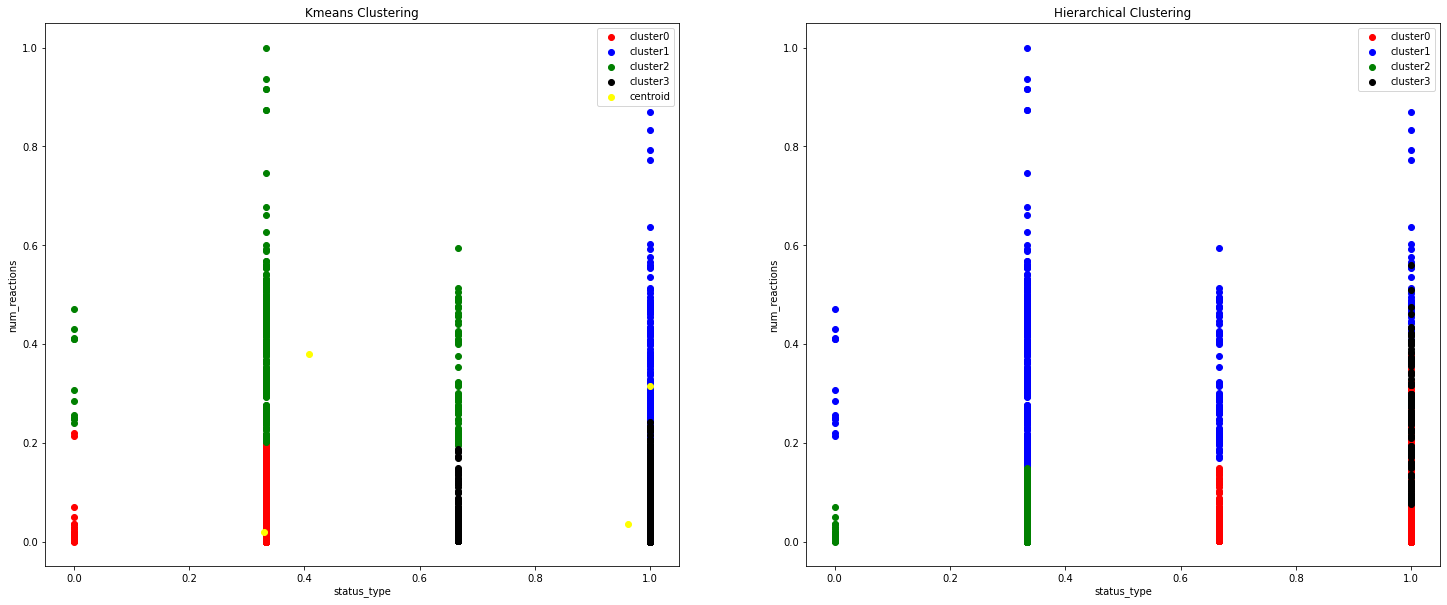

In [18]:
# compare the results of kmeans and heirachical clustering and actual values 
plt.figure(figsize=(25,10))
plt.subplot(1,2,1)
plt.scatter(df_std.iloc[y==0,0],df_std.iloc[y==0,1],c="red",label="cluster0")
plt.scatter(df_std.iloc[y==1,0],df_std.iloc[y==1,1],c="blue",label="cluster1")
plt.scatter(df_std.iloc[y==2,0],df_std.iloc[y==2,1],c="green",label="cluster2")
plt.scatter(df_std.iloc[y==3,0],df_std.iloc[y==3,1],c="black",label="cluster3")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c="yellow",label="centroid")
plt.xlabel(df_std.columns[0])
plt.ylabel(df_std.columns[1])
plt.legend()
plt.title("Kmeans Clustering")
plt.subplot(1,2,2)
plt.scatter(df_std.iloc[y_hc==0,0],df_std.iloc[y_hc==0,1],c="red",label="cluster0")
plt.scatter(df_std.iloc[y_hc==1,0],df_std.iloc[y_hc==1,1],c="blue",label="cluster1")
plt.scatter(df_std.iloc[y_hc==2,0],df_std.iloc[y_hc==2,1],c="green",label="cluster2")
plt.scatter(df_std.iloc[y_hc==3,0],df_std.iloc[y_hc==3,1],c="black",label="cluster3")
plt.xlabel(df_std.columns[0])
plt.ylabel(df_std.columns[1])
plt.legend()
plt.title("Hierarchical Clustering")